# Decision Tree Model Bagging

In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

In [14]:
data = pd.read_csv("https://raw.githubusercontent.com/zunhnin/alzheimers_disease/refs/heads/main/alzheimers_disease_data.csv")

In [18]:
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [20]:
features = ["MMSE", "MemoryComplaints", "ADL", "BehavioralProblems", "FunctionalAssessment"]
target = "Diagnosis"

In [22]:
x = data[features]
y = data[target]

In [24]:
# Split into 80% training and 20% testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging with tree
results = {}

for n in [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]:
    models = []
    all_preds = []

    for i in range(n):
        #Create a bootstrap sample from 80% training data
        indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
        x_sample = x_train.iloc[indices]
        y_sample = y_train.iloc[indices]

        #Train model on the bootstrap sample with class weighting
        model = DecisionTreeClassifier(max_depth=10, class_weight='balanced')
        model.fit(x_sample, y_sample)
        models.append(model)

        # Train model on the bootstrap sample
        model = DecisionTreeClassifier()
        model.fit(x_sample, y_sample)
        models.append(model)
s
        # Predict on 20% test data
        preds = model.predict(x_test)
        all_preds.append(preds)

    # Majority vote across all trees
    all_preds = np.array(all_preds).T
    final_preds = mode(all_preds, axis=1).mode.ravel()
    # Evaluate on test set
    acc = accuracy_score(y_test, final_preds)
    results[n] = acc
    print(f"{n} trees → Test Accuracy: {acc:.4f}")


5 trees → Test Accuracy: 0.9488
6 trees → Test Accuracy: 0.9395
7 trees → Test Accuracy: 0.9326
8 trees → Test Accuracy: 0.9512
9 trees → Test Accuracy: 0.9535
10 trees → Test Accuracy: 0.9512
11 trees → Test Accuracy: 0.9395
12 trees → Test Accuracy: 0.9465
13 trees → Test Accuracy: 0.9512
14 trees → Test Accuracy: 0.9488
15 trees → Test Accuracy: 0.9512
20 trees → Test Accuracy: 0.9535
21 trees → Test Accuracy: 0.9512
22 trees → Test Accuracy: 0.9512
23 trees → Test Accuracy: 0.9581
24 trees → Test Accuracy: 0.9512
25 trees → Test Accuracy: 0.9512
26 trees → Test Accuracy: 0.9488
27 trees → Test Accuracy: 0.9512
28 trees → Test Accuracy: 0.9535
29 trees → Test Accuracy: 0.9558
30 trees → Test Accuracy: 0.9488


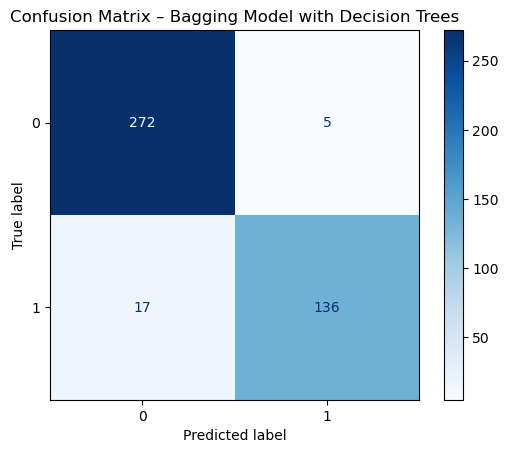

<Figure size 640x480 with 0 Axes>

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, final_preds, cmap='Blues')
plt.title("Confusion Matrix – Bagging Model with Decision Trees")
plt.show()
plt.tight_layout()
plt.show()